# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [12]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [13]:
sns.set()

### Setup objective function

In [37]:
def objective(x):
    return np.array([np.sum(np.power(x,2)), np.sum(np.power(x, 4))])

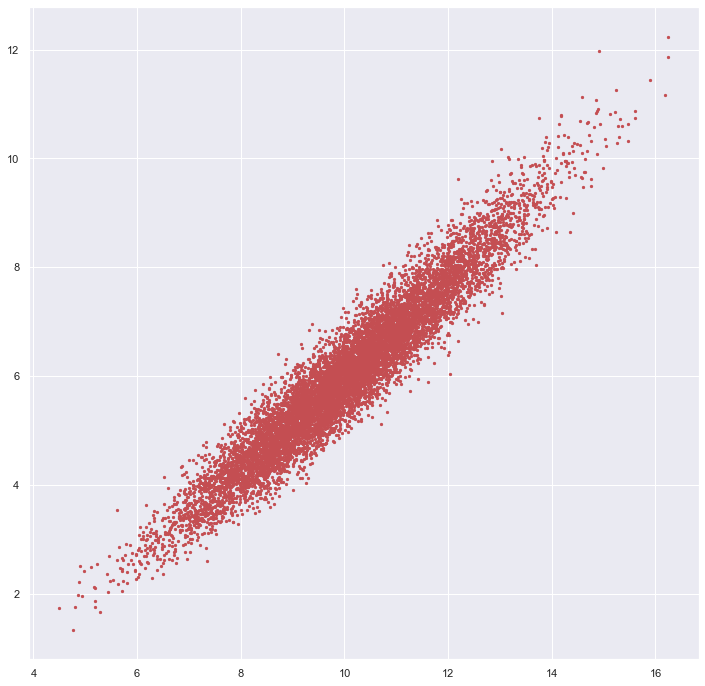

In [38]:
plt.figure(figsize=[12, 12])

randomized_grid = np.random.rand(10_000 * 30)
values = np.apply_along_axis(objective, 1, randomized_grid.reshape(10_000, 30))
plt.scatter(values[:, 0], values[:, 1], c="r", s=5)

In [24]:
optimzier = SPEAOptimizer(
    objective,
    n_dim=30,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="mean_shift"
)

In [25]:
history = optimzier.optimize(
    generations=1000,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.2,
    reducing_period=10,
    search_range=((-1, 1),),
    mutation_strength=0.1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="const",
    crossover_schedule="const",
    strength_schedule="const",
    logging=False,
    logging_path="../data/zdt_n1.csv",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:12<00:00,  1.32s/it]


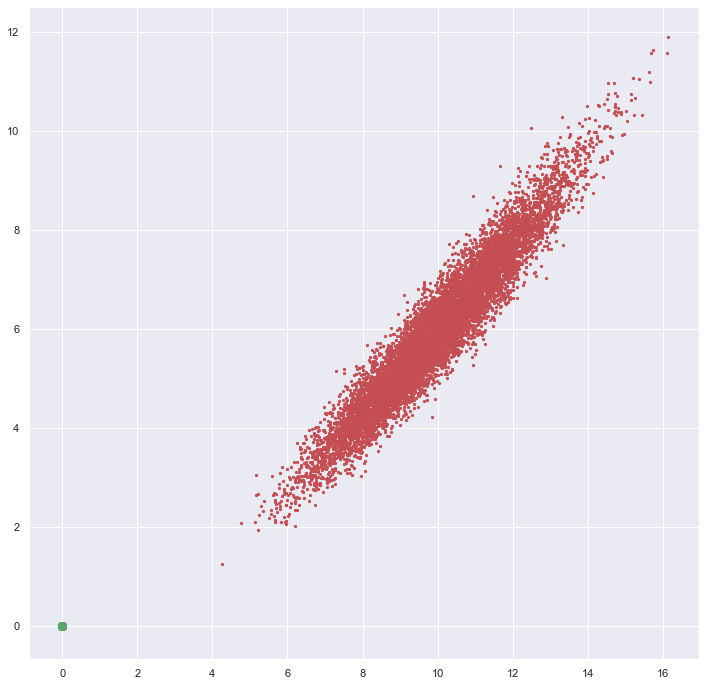

In [26]:
plt.figure(figsize=[12, 12])

pareto_values = np.apply_along_axis(objective, 1, optimzier.pareto_front)

plt.scatter(values[:, 0], values[:, 1], c="r", s=5)
plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)

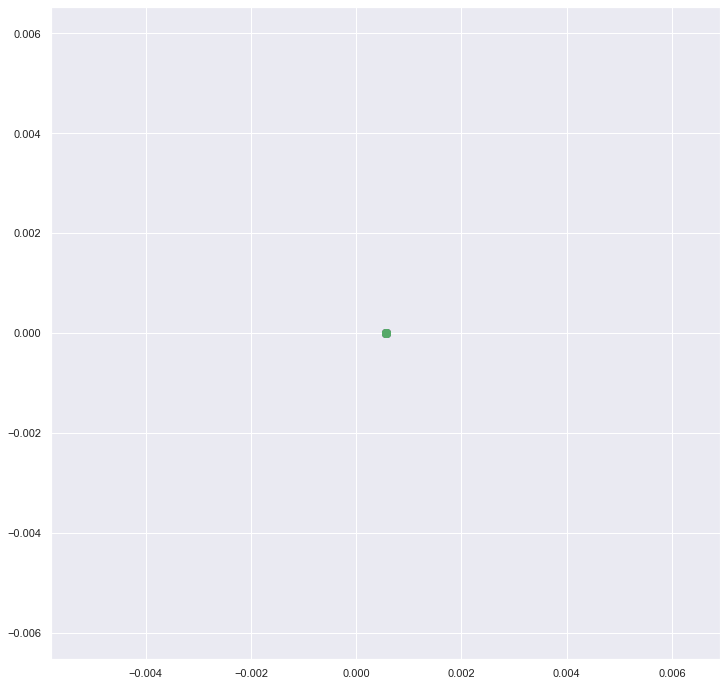

In [29]:
plt.figure(figsize=[12, 12])

plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)